### May_27_Hypothesis_Test

# Confidence level confidence interval

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
cardio=pd.read_csv("Cardio_vascular.csv")
cardio.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Calculate the confidence interval on different parameters

Confidence Intervals Using the Normal Distribution
If we’re working with larger samples
(n≥30), we can assume that the 
sampling distribution of the sample mean is 
normally distributed (thanks to the Central Limit Theorem) and 
can instead use the norm.interval() function from 
the scipy.stats library.

**scipy.norm.interval function is used to calculate confidence Intervals for the large dataset where the n>30 .**

In [5]:
import scipy.stats as st
st.norm.interval(confidence=0.90,loc=np.mean(cardio["chol"]),scale=st.sem(cardio["chol"]))

(243.34935246016116, 248.65064753983884)

In [6]:
st.norm.interval(confidence=0.95,loc=np.mean(cardio["chol"]),scale=st.sem(cardio["chol"]))

(242.8415586477306, 249.1584413522694)

## another example

**The following example shows how to calculate a confidence interval for the true population mean height (in inches) of a certain species of plant, using a sample of 50 plants:**

In [7]:
# define  sample data
np.random.seed(0)
data=np.random.randint(10,30,50) # 50 samples btw 10 and 30

In [8]:
data

array([22, 25, 10, 13, 13, 17, 19, 29, 28, 14, 16, 22, 11, 16, 17, 24, 27,
       15, 23, 18, 19, 29, 26, 29, 15, 25, 25, 10, 28, 13, 27, 29, 29, 29,
       24, 17, 10, 11, 19, 10, 20, 13, 21, 28, 12, 10, 10, 14, 15, 16])

In [9]:
st.norm.interval(confidence=0.90,loc=np.mean(data),scale=st.sem(data))

(17.695874465475686, 20.78412553452431)

In [10]:
st.norm.interval(confidence=0.99,loc=np.mean(data),scale=st.sem(data))

(16.821910186405187, 21.65808981359481)

there is 99% chance that the CI of 16.82,21.65 contains the true population mean height of the plants.

# Confidence Intervals Using the t Distribution

**If we’re working with a small sample (n <30), we can use the t.interval() function from the scipy.stats library to calculate a confidence interval for a population mean.**


**Example:- calculate a confidence interval for the true population mean height (in inches) of a certain species of plant, using a sample of 15 plants:**

In [11]:
data1=np.random.randint(10,30,15)
data1

array([18, 27, 25, 14, 19, 20, 11, 11, 17, 19, 13, 16, 21, 24, 28])

In [13]:
st.t.interval(confidence=.95,df=len(data1)-1,loc=np.mean(data1),scale=st.sem(data1))

(15.85619382151231, 21.877139511821024)

# hypothesis testing

Statistical Analysis

Important terms used in statistics while interpreting the results.

Population: The entire data or entire possible observations.
    
Sample: A subset of observations taken from population. 
    As the sample size increases sample will represent the 
    population more closely(Law of Large Numbers).
    
Parameters: It's the property of population which 
    we are interested in and never know the exact 
    value unless we do analysis on entire population
    (which is never the case) eg. mean( μ).
    
Estimates: It's sample idea/value about the population parameters. 
    The entire goal of statistics is to make these sample estimates 
    as close as population parameters eg, average( x¯) 
    is the best possible sample estimate of  μ .
    
Descriptive Statistics: It's for summarizing data.
    
Inferential Statistics: It's for drawing conclusions 
    about the population from samples eg., 
    estimating population mean( μ ) using sample average( x¯ ).
    
Parametric Statistics: Statistical methods where we assume a 
    distribution of the data such as Gaussian.
    
Non-Parametric Statistics: Statistical methods where we do not assume 
    any distribution of the data ie., distribution free.
    
Statistical Hypothesis Tests: Methods that quantify the likelihood of 
    observing the result given an assumption or expectation about the result. 
    We will talk on this more later.
    
Estimation Statistics: Methods that quantify the uncertainty of a result 
    using confidence intervals.

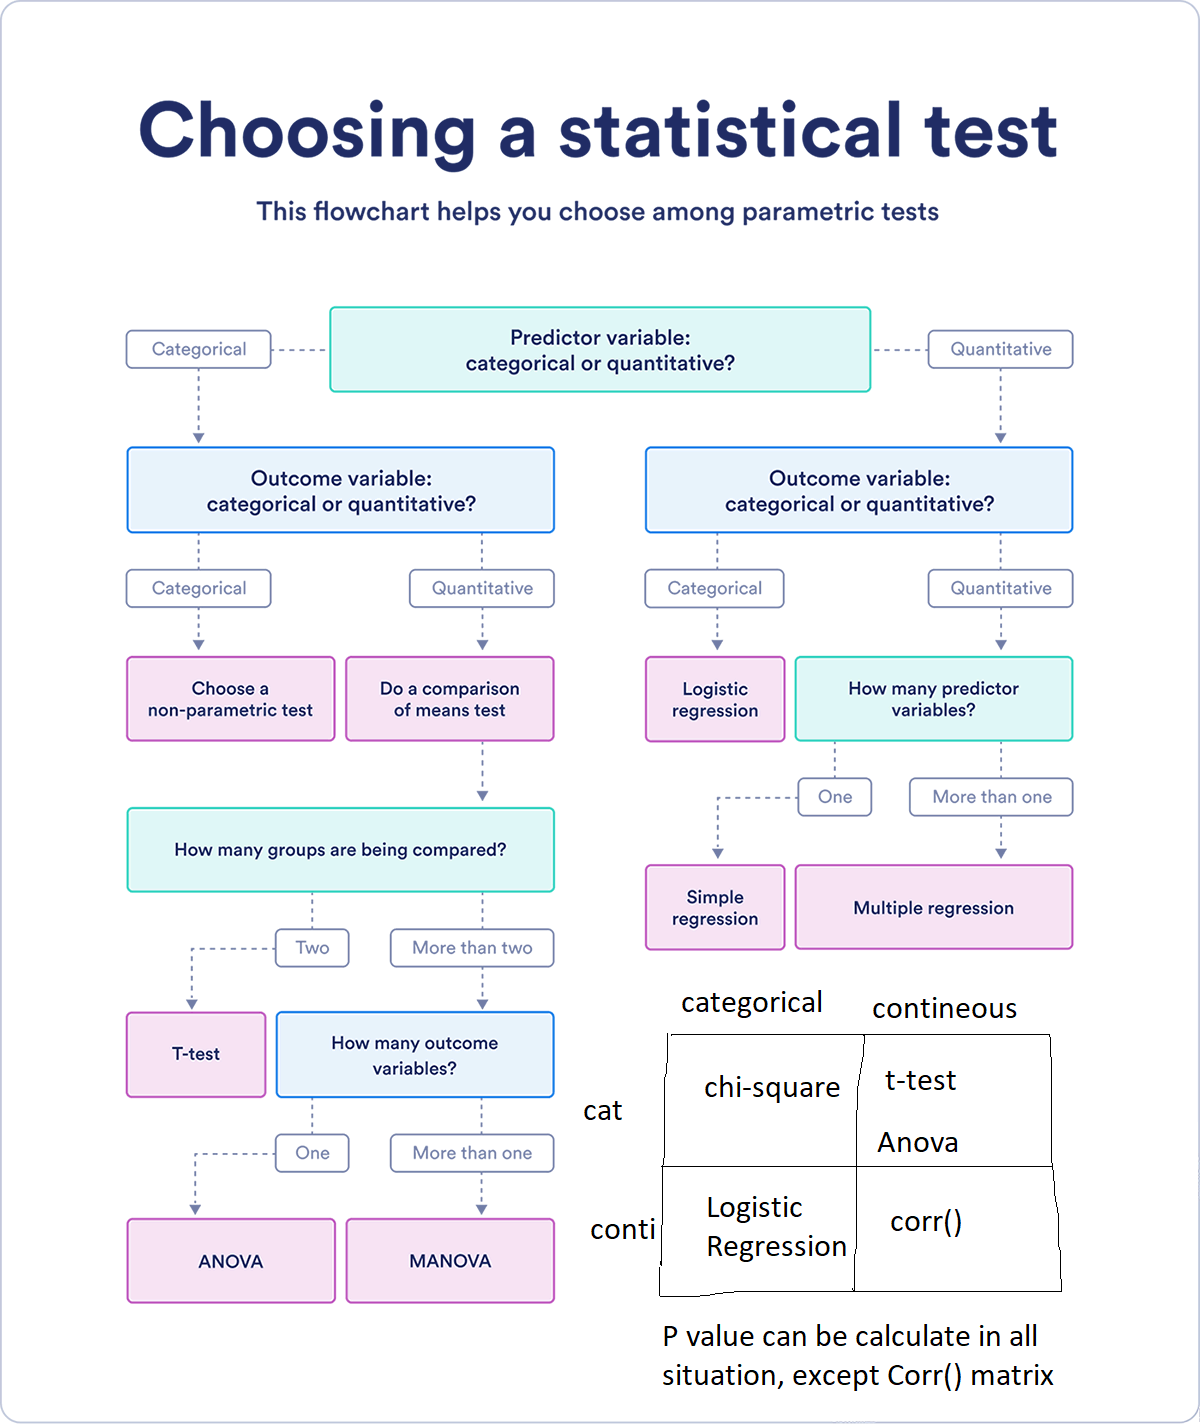

# paired samples t-test


A paired samples t-test is used to compare the means of two samples when each 
observation in one sample can be paired with an observation in the other sample.

#### Sports training program- example 1

Suppose we want to know whether or not a certain training program is able to 
increase the max vertical jump (in inches) of college basketball players.
To test this, we may recruit a simple random sample of 20 college basketball 
players and measure each of their max vertical jumps. Then, we may have each 
player use the training program for one month and then measure their max vertical 
jump again at the end of the month.


A paired samples t-test is commonly used in two scenarios:

    1. A measurement is taken on a player before and after training program – 
    e.g. the max vertical jump of college basketball players is measured before 
    and after participating in a training program.
    
        
In both cases we are interested in comparing the mean measurement between two groups 
in which each observation in one sample can be paired with an observation 
in the other sample.

In [14]:
before_training=[22,20,19,24,25,25,28,22,30,27,24,18,16,19,19,28,24,25,25,23]
after_training=[24,22,19,22,28,26,28,24,30,29,25,20,17,18,18,28,26,27,27,24]

Step 2: Define the hypotheses.
We will perform the paired samples t-test with the following hypotheses:

•H0: μ1 = μ2 (the two population means are equal)

•H1: μ1 ≠ μ2 (the two population means are not equal)


In [15]:
import scipy.stats as stats
#performing the paired sample t test
stats.ttest_rel(before_training,after_training)

TtestResult(statistic=-3.22617331116718, pvalue=0.004445370704412228, df=19)

here p value is <0.05(alpha value or significant level) we are able to reject null hypothesis.

the max jump of the student has better after the training program.

### Compare Medical Procedures Using Hypothesis Tests -example -2

**suppose a doctor believes that a new drug is able to reduce blood pressure in obese patients. To test this, he may measure the blood pressure of 15 patients before and after using the new drug for one month.**


# paired samples t- test- 

**The doctor will perform a paired samples t- test using the following hypotheses:**

**•H0: μafter = μbefore (the mean blood pressure is the same before and after using the drug)**

**•HA: μafter < μbefore (the mean blood pressure is less after using the drug)**
    
**If the p-value of the test is less than some significance level (e.g. α = .05), then Doctor can reject the null hypothesis and conclude that the new drug leads to reduced blood pressure.**


In [17]:
before_BP = [120, 108, 184, 93, 125, 98, 184, 187, 195, 191, 183, 189, 177, 168, 191]
after_BP = [112, 109, 188, 90, 127, 90, 188, 190, 190, 196, 188, 189, 181, 134, 160]

In [18]:
stats.ttest_rel(before_BP,after_BP)

TtestResult(statistic=1.2730454034727652, pvalue=0.2237359301598127, df=14)

**Here P-value is >.05 so Failed to reject H0. There is no effect on drug.**

### paired samples t- test Example-3

### Student exam performance

**Suppose we want to know whether a certain study program significantly impacts student performance on a particular exam. To test this, we have 15 students in a class take a pre-test. Then, we have each of the students participate in the study program for two weeks. Then, the students retake a test of similar difficulty.**

**To compare the difference between the mean scores on the first and second test, we use a paired samples t-test because for each student their first test score can be paired with their second test score.**

In [19]:
pre = [88, 82, 84, 93, 75, 78, 84, 87, 95, 91, 83, 89, 77, 68, 91]
post = [80, 84, 88, 90, 72, 80, 88, 90, 90, 92, 88, 89, 81, 69, 92]

In this example, the paired samples t-test uses the following null and alternative hypotheses: 

**H0: The mean pre-test and post-test scores are equal**

**HA:The mean pre-test and post-test scores are not equal**


In [20]:
stats.ttest_rel(pre,post)

TtestResult(statistic=-0.5524283770015994, pvalue=0.5893664333246174, df=14)

**pvalue>0.05 so failed to reject H0, test has no effect.**

# Two Sample t-test in Python

**A two sample t-test is used to test whether or not the means of two populations are equal. we dont have data of population so we infer from two sample mean.**



#### Example 1 -Two sample t test

**For example, suppose we want to know whether or not the mean weight between two different species of turtles is equal.**

**To test this, we collect a simple random sample of turtles from each species with the following weights:**

Sample 1: 300, 315, 320, 311, 314, 309, 300, 308, 305, 303, 305, 301, 303

Sample 2: 335, 329, 322, 321, 324, 319, 304, 308, 305, 311, 307, 300, 305

**The following code shows how to use the ttest_ind() function from the scipy.stats library to perform this two sample t-test:**

**The two hypotheses for this particular two sample t-test are as follows:**

**H0: µ1 = µ2 (the mean weight between the two species is equal)**

**HA: µ1 ≠ µ2 (the mean weight between the two species is not equal)**

In [21]:
import scipy.stats as stats
Sample1=[300, 315, 320, 311, 314, 309, 300, 308, 305, 303, 305, 301, 303]
Sample2=[335, 329, 322, 321, 324, 319, 304, 308, 305, 311, 307, 300, 305]


In [26]:
stats.ttest_ind(a=Sample1,b=Sample2,equal_var=True)

TtestResult(statistic=-2.10090292575557, pvalue=0.04633501389516513, df=24.0)

pvalue < .05, Reject H0.

In [24]:
# BY DEFAULT VARIANCE_EQUAL=true , lets check the correct status
var1=np.var(Sample1)
var2=np.var(Sample2)
var1,var2

(36.63905325443787, 111.62130177514791)

In [25]:
var2/var1
# if it is less than 4 , that means we assume the population variance are equal.

3.0465116279069764

#the p value is 0.0463 less than 0.05 , we reject null hypothesis
we have sufficient evident that the mean weight of two species are not equal.

#### Example 2 : Two Sample t-Test


**Researchers want to know whether or not two different species of plants have the same mean height.**

**To test this, they collect a simple random sample of 20 plants from each species.**

**Use the following steps to conduct a two sample t-test to determine if** 

**the two species of plants have the same height.**

**Step 1: Create the data.**

**First, we’ll create two arrays to hold the measurements of each group of 20 plants:**


In [27]:
import numpy as np
group1 = np.array([14, 15, 15, 16, 13, 8, 14, 17, 16, 14, 19, 20, 21, 15, 15, 16, 16, 13, 14, 12])
group2 = np.array([15, 17, 14, 17, 14, 8, 12, 19, 19, 14, 17, 22, 24, 16, 13, 16, 13, 18, 15, 13])


In [28]:
var1=np.var(group1)
var2=np.var(group2)

In [30]:
var2/var1
# less than 4 so we can assume pop varence are equal.

1.586541572306697

In [31]:
#two sample t-test
stats.ttest_ind(group1,group2)

TtestResult(statistic=-0.6337397070250238, pvalue=0.5300471010405257, df=38.0)

pval>.05 so failed to reject H0, failed to prove both pop have diffrent mean.

### example_3  Two Sample t-Test

# hypothesis test university exam

In [ ]:
"""A university professor gave online lectures instead of face-to-face classes 
due to Covid-19. Later, he uploaded recorded lectures to the cloud for students 
who followed the course asynchronously (those who did not attend the lesson but 
later watched the records). However, he believes that the students who attend class 
at the class time and participate in the process are more successful. 
Therefore, he recorded the average grades of the students at the end of the semester. 
The data is below.

synchronous = [94. , 84.9, 82.6, 69.5, 80.1, 79.6, 81.4, 77.8, 81.7, 78.8, 73.2, 
87.9, 87.9, 93.5, 82.3, 79.3, 78.3, 71.6, 88.6, 74.6, 74.1, 80.6]

asynchronous = [77.1, 71.7, 91. , 72.2, 74.8, 85.1, 67.6, 69.9, 75.3, 71.7, 
65.7, 72.6, 71.5, 78.2]

Conduct the hypothesis testing to check whether the professor’s belief is 
statistically significant by using a 0.05 
significance level to evaluate the null and alternative hypotheses. 
Before doing hypothesis testing, check the related assumptions. Comment on the results."""

In [ ]:
"""1. Defining Hypothesis
Since the grades are obtained from the different individuals, the data is unpaired.

H₀: μₛ≤μₐ
H₁: μₛ>μₐ

2. Assumption Check
H₀: The data is normally distributed., means two group performance are same.
H₁: The data is not normally distributed., means two group performance are not same.
Assume that α=0.05. If the p-value is >0.05, it can be said that data is normally distributed."""

In [32]:
sync = np.array([94. , 84.9, 82.6, 69.5, 80.1, 79.6, 81.4, 77.8, 81.7, 78.8, 73.2,
       87.9, 87.9, 93.5, 82.3, 79.3, 78.3, 71.6, 88.6, 74.6, 74.1, 80.6])
asyncr = np.array([77.1, 71.7, 91. , 72.2, 74.8, 85.1, 67.6, 69.9, 75.3, 71.7, 
                   65.7, 72.6, 71.5, 78.2])

In [33]:
# find the variance
print(np.var(sync),np.var(asyncr))

40.75208677685952 41.81714285714285


In [34]:
41.81/40.75

1.0260122699386505

In [35]:
# it is less than 4
stats.ttest_ind(a=sync,b=asyncr,equal_var=True)

TtestResult(statistic=2.8414882345796917, pvalue=0.00753598434082613, df=34.0)

**we are able to reject the null hypothesis, both student group performance are not same.**

# t test in pandas

In [ ]:
"""
For example, suppose a professor wants to know if two different 
studying methods lead to different mean exam scores.

To test this, he recruits 10 students to use method A and 10 students to use method B.

H0--two different methods lead to same exam score.
H1-- two different methods lead to different exam score.

 :"""

In [38]:
#create pandas DataFrame
import pandas as pd
df = pd.DataFrame({'method': ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A','A',
                              'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'],
                   'score': [71, 72, 72, 75, 78, 81, 82, 83, 89, 91, 80, 81, 81,85,
                             84, 88, 88, 89, 90, 90, 91]})

#view first five rows of DataFrame
df.head(20)

,method,score
0,A,71
1,A,72
2,A,72
3,A,75
4,A,78
5,A,81
6,A,82
7,A,83
8,A,89
9,A,91


In [39]:
group1=df[df["method"]=="A"]
group2=df[df["method"]=="B"]
stats.ttest_ind(group1["score"],group2["score"])

Ttest_indResult(statistic=-3.014813486502715, pvalue=0.007124060646945052)

In [ ]:
p value is less than 0.05 , we are able to reject the null hypothesis
that means two different methods lead to different exam score.

### Hypothesis test on cardio_vascular desiese

In [ ]:
"""
For example, suppose a Doctor wants to know if two different 
gender lead to different mean chol level.

H0--male and female lead to same mean of chol level.
H1-- male and female lead to different mean of chol level.
 :"""

In [40]:
cardio.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [42]:
# define samples
male_group=cardio[cardio["sex"]==1]
female_group=cardio[cardio["sex"]==0]
stats.ttest_ind(male_group["chol"],female_group["chol"])

Ttest_indResult(statistic=-6.469575105051173, pvalue=1.5208584737351199e-10)

In [ ]:
p value is less than 0.05 we are able to reject H0.
male and female lead to different mean of chol level.

In [ ]:
# assignment please calculate p value for other columns also like trestbps,thalach

In [43]:
# We are trying on two categorical variable pl note this result is not correct
# because t test is for categorical & contineous
male_group=cardio[cardio["sex"]==1]
female_group=cardio[cardio["sex"]==0]
stats.ttest_ind(male_group["cp"],female_group["cp"])

Ttest_indResult(statistic=-1.3162814393057423, pvalue=0.18837444033563006)

"""
For example, suppose a Doctor wants to know if disease and healthy lead to different mean chol level.

H0--disease and healthy lead to same mean of chol level.
H1--disease and healthy lead to different mean of chol level.
 :"""

# Welch’s t-Test in Pandas

In [ ]:
Welch’s t-Test: 
    Two sample t-Test is used to compare the means of two different 
    independent datasets. But we can apply a Two-Sample T-Test on those data groups 
    that share the same variance. 
    
    Now to compare two data groups having different variances 
    we use Welch’s t-Test. It is regarded as the parametric 
    equivalent of the Two-Sample T-test. 

In [ ]:
"""Welch’s t-Test in Pandas
Welch’s t-test is similar to the independent two sample t-test, except it does not 
assume that the two 
populations that the samples came from have equal variance.

To perform Welch’s t-test on the exact same dataset as the previous example, 
we simply need to 
specify equal_var=False within the ttest_ind() function as follows:"""

In [ ]:
Let us consider an example, we are given two-sample data, 
each containing heights of 10 students of a class. We need 
to check whether two different class students have the same mean score. 
We can create data groups using numpy.array() method.

In [44]:
data_group1 = np.array([14, 15, 15, 16, 13, 8, 14,
                        17, 16, 14, 19, 20, 21, 15,
                        15])
data_group2 = np.array([36, 37, 44, 27, 24, 28, 27,
                        39, 29, 24, 37, 32, 24, 26,
                        33])
  


In [45]:
# Print the variance of both data groups
print(np.var(data_group1), np.var(data_group2))

9.048888888888886 36.782222222222224


In [46]:
36.78/9.04

4.068584070796461

In [47]:
stats.ttest_ind(data_group1,data_group2,equal_var=False)

Ttest_indResult(statistic=-8.658854219832454, pvalue=2.7574279223834183e-08)

# try to solve it 

In [ ]:
#create pandas DataFrame
df = pd.DataFrame({'method': ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
                              'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'],
                   'score': [71, 72, 72, 75, 78, 81, 82, 83, 89, 91, 80, 81, 81,
                             84, 88, 88, 89, 90, 90, 91]})

In [ ]:
#define samples
group1 = df[df['method']=='A']
group2 = df[df['method']=='B']



# One Sample t-test in Python

In [ ]:
A one sample t-test is used to test whether or not the mean of a population is equal to some value.

In [ ]:
# """For example, suppose we want to know whether or not the mean weight of a certain species of 
some turtle is equal to 310 pounds.

To test this, we go out and collect a simple random sample of turtles with the following weights:

Weights: 300, 315, 320, 311, 314, 309, 300, 308, 305, 303, 305, 301, 303

:"""

In [ ]:
"""The two hypotheses for this particular one sample t-test are as follows:

H0: µ = 310 (the mean weight for this species of turtle is 310 pounds)
HA: µ ≠310 (the mean weight is not 310 pounds)"""

In [48]:
# sample data
sample_data=[300, 315, 320, 311, 314, 309, 300, 308, 305, 303, 305, 301, 303]
# perform a sample t test
stats.ttest_1samp(a=sample_data,popmean=310)

TtestResult(statistic=-1.5848116313861254, pvalue=0.1389944275158753, df=12)

In [ ]:
# p value is 0.1389 is more than 0.05(alpha value). we fail to reject the null hypothesis.
the mean weight for this species of turtle is 310 pounds

# please try to solve it

In [ ]:
Suppose a botanist wants to know if the mean height of a certain species of 
plant is equal to 15 inches. She collects a random sample of 12 plants and 
records each of their heights in inches.


In [ ]:
data = [14, 14, 16, 13, 12, 17, 15, 14, 15, 13, 15, 14]

# Conduct a Mann-Whitney U Test in Python

In [ ]:
A Mann-Whitney U test is used to compare the differences between two samples when the 
sample distributions are not normally distributed and the sample sizes are small (n <30).

It is considered to be the nonparametric equivalent to the two sample t-test.


In [ ]:
Example: Mann-Whitney U Test :-
        
Researchers want to know if a fuel treatment leads to a change in the average mpg of a car. 
To test this, they measure the mpg of 12 cars with the fuel treatment and 12 cars without it.
Since the sample sizes are small and the researchers suspect that the sample distributions 
are not normally distributed, they decided to perform a Mann-Whitney U test to determine 
if there is a statistically significant difference in mpg between the two groups.


In [49]:
#First, we’ll create two arrays to hold the mpg values for each group of cars:
group1 = [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]
group2 = [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]
# H0= The mpg is equal between two groups
# H1=the mpg is not equalbetween the two groups.

In [50]:
stats.mannwhitneyu(group1,group2)


MannwhitneyuResult(statistic=50.0, pvalue=0.21138945901258455)

In [ ]:
here p is more than 0.05 , not able to reject the null hypothesis.
The mpg is equal between two groups

# Conduct a Wilcoxon Signed-Rank Test in Python

In [ ]:
The Wilcoxon Signed-Rank Test is the non-parametric version of the paired samples t-test.
It is used to test whether or not there is a significant difference between two population 
means when the distribution of the differences between the two samples cannot be 
assumed to be normal.

In [ ]:
Example: Wilcoxon Signed-Rank Test 
Researchers want to know if a new fuel treatment leads to a change in the average mpg 
of a certain car. To test this, they measure the mpg of 12 cars with and without the 
fuel treatment.

objective:-  to determine if there is a difference in the mean mpg between the two groups.
Method:-perform a Wilcoxon Signed-Rank Test

In [51]:
#Step 1: Create the data to hold the mpg values for each group of cars:
group1 = [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]
group2 = [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]


In [52]:
stats.wilcoxon(group1,group2)


C:\Users\User\anaconda3_april_5\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=10.5, pvalue=0.044065400736826854)

In [ ]:
# pl note its a pair sample non parametric test we are using same 
car before and after fuel treatment .
p valueis less than 0.05, we are able to reject null hypothesis.
h1=the mpg is not equal before and after fuel treatment.


# Perform  Two Sample Z-Tests in Python

In [ ]:
#from statsmodels.stats.weightstats import ztest as ztest
ztest(x1, x2, value=0) 
where:

x1: values for the first sample
x2: values for the second sample (performing a two sample z-test)
value: mean difference (in two sample test)


In [ ]:
Example 1: Two Sample Z-Test in Python
Suppose the IQ levels among individuals in two different cities are known to 
be normally distributed with known standard deviations.

A researcher wants to know if the mean IQ level between individuals in 
city A and city B are different, so she selects a simple random sample 
of  20 individuals from each city and records their IQ levels.

Objective:-to determine if the mean IQ level is different between the two cities:
H0=mean IQ level is same bwtween the two coties.
H1=mean IQ level is different bwtween the two cities.

In [53]:
from statsmodels.stats.weightstats import ztest as ztest

#enter IQ levels for 20 individuals from each city
cityA = [82, 84, 85, 89, 91, 91, 92, 94, 99, 99,
         105, 109, 109, 109, 110, 112, 112, 113, 114, 114]

cityB = [90, 91, 91, 91, 95, 95, 99, 99, 108, 109,
         109, 114, 115, 116, 117, 117, 128, 129, 130, 133]



In [54]:
ztest(cityA, cityB, value=0) 

(-1.9953236073282115, 0.046007596761332065)

# Guide to Statistical Hypothesis Tests in Python

# Normality Tests

In [ ]:
Normality Tests
Main obejctive of performing Normality Tests is to validate the Gaussian distribution of data.



In [ ]:
# visual approach (1)histogram (2)QQ plot
# statistical approach

# Shapiro-Wilk Test

In [ ]:
Shapiro-Wilk Test
Tests whether a data sample has a Gaussian distribution.
Assumption
Observations in each sample are independent and distributed identically.
Hypothesis
H0: the sample has a Gaussian distribution.
H1: the sample does not have a Gaussian distribution.

In [55]:
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]

In [57]:
from scipy.stats import shapiro
stat,p=shapiro(data)
print(p)

0.1934097558259964


In [ ]:
p is more than 0.05 , unable to reject null hypothesis 
H0: the sample has a Gaussian distribution.

In [58]:
cardio.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [59]:
stat,p=shapiro(cardio["chol"])
print(p)

4.0010225784919354e-18


In [ ]:
p value less than 0.05 , able to reject null hypothesis

In [ ]:
H1: the cardio.chol does not have a Gaussian distribution.

# D’Agostino’s K^2 Test

In [ ]:
D’Agostino’s K^2 Test
Tests whether a data sample has a Gaussian distribution.
Assumption
Observations in each sample are independent and distributed identically.
Hypothesis
H0: the sample has a Gaussian distribution.
H1: the sample does not have a Gaussian distribution.

In [60]:
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]

In [61]:
from scipy.stats import normaltest

In [62]:
stat,p=normaltest(data1)

C:\Users\User\anaconda3_april_5\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [63]:
p

0.18342710340675566

# Anderson-Darling Test

In [ ]:
Anderson-Darling Test
Tests whether a data sample has a Gaussian distribution.
Assumption
Observations in each sample are independent and distributed identically.
Hypothesis
H0: the sample has a Gaussian distribution.
H1: the sample does not have a Gaussian distribution.



In [64]:
data2 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]

In [65]:
from scipy.stats import anderson

In [72]:
result=anderson(data2)
#result
print(result.statistic)

for i in range(len(result.critical_values)):
    sl,cv=result.significance_level[i],result.critical_values[i]
    if result.statistic<cv:
        print("probability of gaussian distribution at % ", sl)
    else:
        print("probability of not gaussian distribution at % ", sl)
    

0.4239737141854807
probability of gaussian distribution at %  15.0
probability of gaussian distribution at %  10.0
probability of gaussian distribution at %  5.0
probability of gaussian distribution at %  2.5
probability of gaussian distribution at %  1.0


In [70]:
print(result)

AndersonResult(statistic=0.4239737141854807, critical_values=array([0.501, 0.57 , 0.684, 0.798, 0.95 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-0.32489999999999997, scale=1.4568542556557338)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


# Correlation Tests

In [ ]:
Correlation Tests are used to check the correlation between two independent features or variables.



# Pearson’s Correlation Coefficient- parametric test

In [ ]:
Pearson’s Correlation Coefficient
Tests whether a data sample is linearly separable.
Assumption
a) Observations in each sample are independent and distributed identically.
b) Observations are normally distributed.
c) Similar variance between independent variables
Hypothesis
H0: the samples are correlated.
H1: the sample does not have any correlation.

In [73]:
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]

In [74]:
from scipy.stats import pearsonr
stat,p=pearsonr(data1,data2)

In [75]:
p

0.02787296951449617

In [76]:
cardio.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [77]:
corr_matrix=cardio.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103574,-0.071960,0.271001,0.219832,0.121163,-0.132515,-0.390854,0.088017,0.208159,-0.168905,0.271415,0.072191,-0.229133
sex,-0.103574,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.048612,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071960,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.305959,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271001,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.038721,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219832,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.020588,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121163,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.009370,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132515,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.049503,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390854,-0.048612,0.305959,-0.038721,-0.020588,-0.009370,0.049503,1.000000,-0.378870,-0.346867,0.394834,-0.205438,-0.096839,0.421962
exang,0.088017,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.378870,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208159,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.346867,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


# Spearman’s Rank Correlation---Non Parametric Test

In [ ]:
Spearman’s Rank Correlation
Tests whether a data sample is montonically separable.
Assumption
a) Observations in each sample are independent and distributed identically.

Hypothesis
H0: the samples are correlated.
H1: the sample does not have any correlation.

In [ ]:
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]

In [78]:
corr_matrix=cardio.corr(method="spearman")
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.105859,-0.092161,0.280046,0.203287,0.110856,-0.149565,-0.383572,0.077391,0.264582,-0.180474,0.339660,0.088443,-0.240181
sex,-0.105859,1.000000,-0.053450,-0.071923,-0.152997,0.027200,-0.044169,-0.046480,0.139157,0.090896,-0.020843,0.113834,0.241115,-0.279501
cp,-0.092161,-0.053450,1.000000,0.025526,-0.092239,0.073738,0.066715,0.335338,-0.427933,-0.195285,0.169307,-0.217002,-0.212186,0.464894
trestbps,0.280046,-0.071923,0.025526,1.000000,0.127010,0.152272,-0.137273,-0.027979,0.043791,0.146722,-0.081828,0.091323,0.058995,-0.115009
chol,0.203287,-0.152997,-0.092239,0.127010,1.000000,0.034139,-0.163354,-0.053430,0.088895,0.057102,-0.026660,0.114584,0.084941,-0.132926
fbs,0.110856,0.027200,0.073738,0.152272,0.034139,1.000000,-0.101709,-0.016838,0.049261,0.032542,-0.048340,0.138197,-0.013372,-0.041164
restecg,-0.149565,-0.044169,0.066715,-0.137273,-0.163354,-0.101709,1.000000,0.092661,-0.073428,-0.075213,0.109506,-0.108580,-0.017285,0.147402
thalach,-0.383572,-0.046480,0.335338,-0.027979,-0.053430,-0.016838,0.092661,1.000000,-0.403849,-0.438630,0.443005,-0.253116,-0.158123,0.429093
exang,0.077391,0.139157,-0.427933,0.043791,0.088895,0.049261,-0.073428,-0.403849,1.000000,0.322149,-0.282593,0.158985,0.240512,-0.438029
oldpeak,0.264582,0.090896,-0.195285,0.146722,0.057102,0.032542,-0.075213,-0.438630,0.322149,1.000000,-0.594413,0.230183,0.253489,-0.437669


# Kendall’s Rank Correlation:-Non Parametric Test

In [ ]:
Kendall’s Rank Correlation
Tests whether a data sample is montonically separable.
Assumption
a) Observations in each sample are independent and distributed identically.

Hypothesis
H0: the samples are correlated.
H1: the sample does not have any correlation.

In [79]:
corr_matrix=cardio.corr(method="kendall")
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.087862,-0.075041,0.196592,0.140355,0.092009,-0.122945,-0.270246,0.064234,0.190485,-0.144596,0.272165,0.071441,-0.199348
sex,-0.087862,1.000000,-0.049971,-0.060382,-0.125464,0.027200,-0.043863,-0.038260,0.139157,0.077931,-0.020261,0.106804,0.234454,-0.279501
cp,-0.075041,-0.049971,1.000000,0.019977,-0.070332,0.068938,0.061801,0.255115,-0.400078,-0.152024,0.154094,-0.190059,-0.193061,0.434633
trestbps,0.196592,-0.060382,0.019977,1.000000,0.086805,0.127838,-0.114669,-0.019251,0.036764,0.103829,-0.066334,0.071111,0.048497,-0.096554
chol,0.140355,-0.125464,-0.070332,0.086805,1.000000,0.027995,-0.133852,-0.035904,0.072897,0.043871,-0.021385,0.091229,0.067184,-0.109004
fbs,0.092009,0.027200,0.068938,0.127838,0.027995,1.000000,-0.101004,-0.013860,0.049261,0.027901,-0.046991,0.129663,-0.013003,-0.041164
restecg,-0.122945,-0.043863,0.061801,-0.114669,-0.133852,-0.101004,1.000000,0.076304,-0.072919,-0.064399,0.105932,-0.101349,-0.016768,0.146380
thalach,-0.270246,-0.038260,0.255115,-0.019251,-0.035904,-0.013860,0.076304,1.000000,-0.332435,-0.309756,0.354438,-0.194792,-0.128231,0.353215
exang,0.064234,0.139157,-0.400078,0.036764,0.072897,0.049261,-0.072919,-0.332435,1.000000,0.276200,-0.274703,0.149167,0.233868,-0.438029
oldpeak,0.190485,0.077931,-0.152024,0.103829,0.043871,0.027901,-0.064399,-0.309756,0.276200,1.000000,-0.507964,0.186809,0.212163,-0.375243


# Analysis of Variance Test (ANOVA)

In [ ]:
Average between two data samples are significantly independent and different.
Assumption
a)Each data sample's observation are independent and distributed.
b)Observations are normally distributed.
c)Observations have same variance between each other.
Hypothesis
H0: the mean between two samples are equal .
H1: the mean between two samples are not equal.

In [80]:
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]

In [81]:
from scipy.stats import f_oneway
sata,p=f_oneway(data1,data2,data3)
p

0.9083957433926546

In [ ]:
our p value is more than 0.05 not able to reject the null hypothesis.

In [ ]:
H0: the mean between two samples are equal .

# Nonparametric Statistical Hypothesis Tests

# Mann-Whitney U Test

In [ ]:

Distribution of two data samples are equal or not.
Assumption
a)Each data sample's observation are independent and distributed.
b)Observations in each data samples can be ranked.
Hypothesis
H0: the distribution of two samples are equal .
H1: the distribution of two samples are not equal.

In [ ]:
# Example of the Mann-Whitney U Test
from scipy.stats import mannwhitneyu
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]


# Correlation tests

In [ ]:
Correlation tests check whether variables are related without hypothesizing a 
cause-and-effect relationship.

These can be used to test whether two variables you want to use in (for example
independent variables) a multiple regression test are autocorrelated.

In [ ]:
Parametric Test:-parametric tests make many assumptions about the data- 
linear relationship,Homegenity.

pearson's correlation test:- Parametric test
how are two independet variables are related.

In [ ]:
nonparametric test:-
Non-parametric tests don’t make as many assumptions about the data, 
and are useful when one or more of the common statistical assumptions 
are violated. However, the inferences they make aren’t as strong as 
with parametric tests.

In [ ]:
Spearman’s r:- can be use for non parametric data in place of Pearson's r correlation test.

# Pearson’s chi-squared statistical

# feature selection using chi-squared test

In [ ]:
A common problem in applied machine learning is determining whether input features 
are relevant to the outcome to be predicted.

This is the problem of feature selection.

In the case of classification problems where input variables are also categorical, 
we can use statistical tests to determine whether the output variable is dependent or 
independent of the input variables. If independent, then the input variable is a 
candidate for a feature that may be irrelevant to the problem and removed from the dataset.

The Pearson’s chi-squared statistical hypothesis is an example of a test for independence 
between categorical variables.

In [ ]:
#its a discrete variables like for example
import pandas as pd
data = pd.DataFrame({
"y1": [1,1,1,1,1,1,1,1,0,1,0,0],
"y2":[1,1,1,1,1,1,1,1,0,1,1,0],
"y3": [0,1,0,0,0,1,0,0,0,1,1,0],
"y4": [0,1,1,1,0,0,1,1,0,0,1,0],

})


In [ ]:
data.head()

In [ ]:
# use Pearson’s chi-squared statistical hypothesis
# before that we have to create Contingency tables

In [ ]:
A contingency table is a multi-way table that describes a data set in which 
each observation belongs to one category for each of several variables.

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import scipy

In [ ]:
stat, p, dof, expected = chi2_contingency(tab)

In [ ]:
print("stat \n",stat)

In [ ]:
print("P \n",p)

In [ ]:
if p > 0.05:
    print('Probably independent')

In [ ]:
print("expected \n",expected)

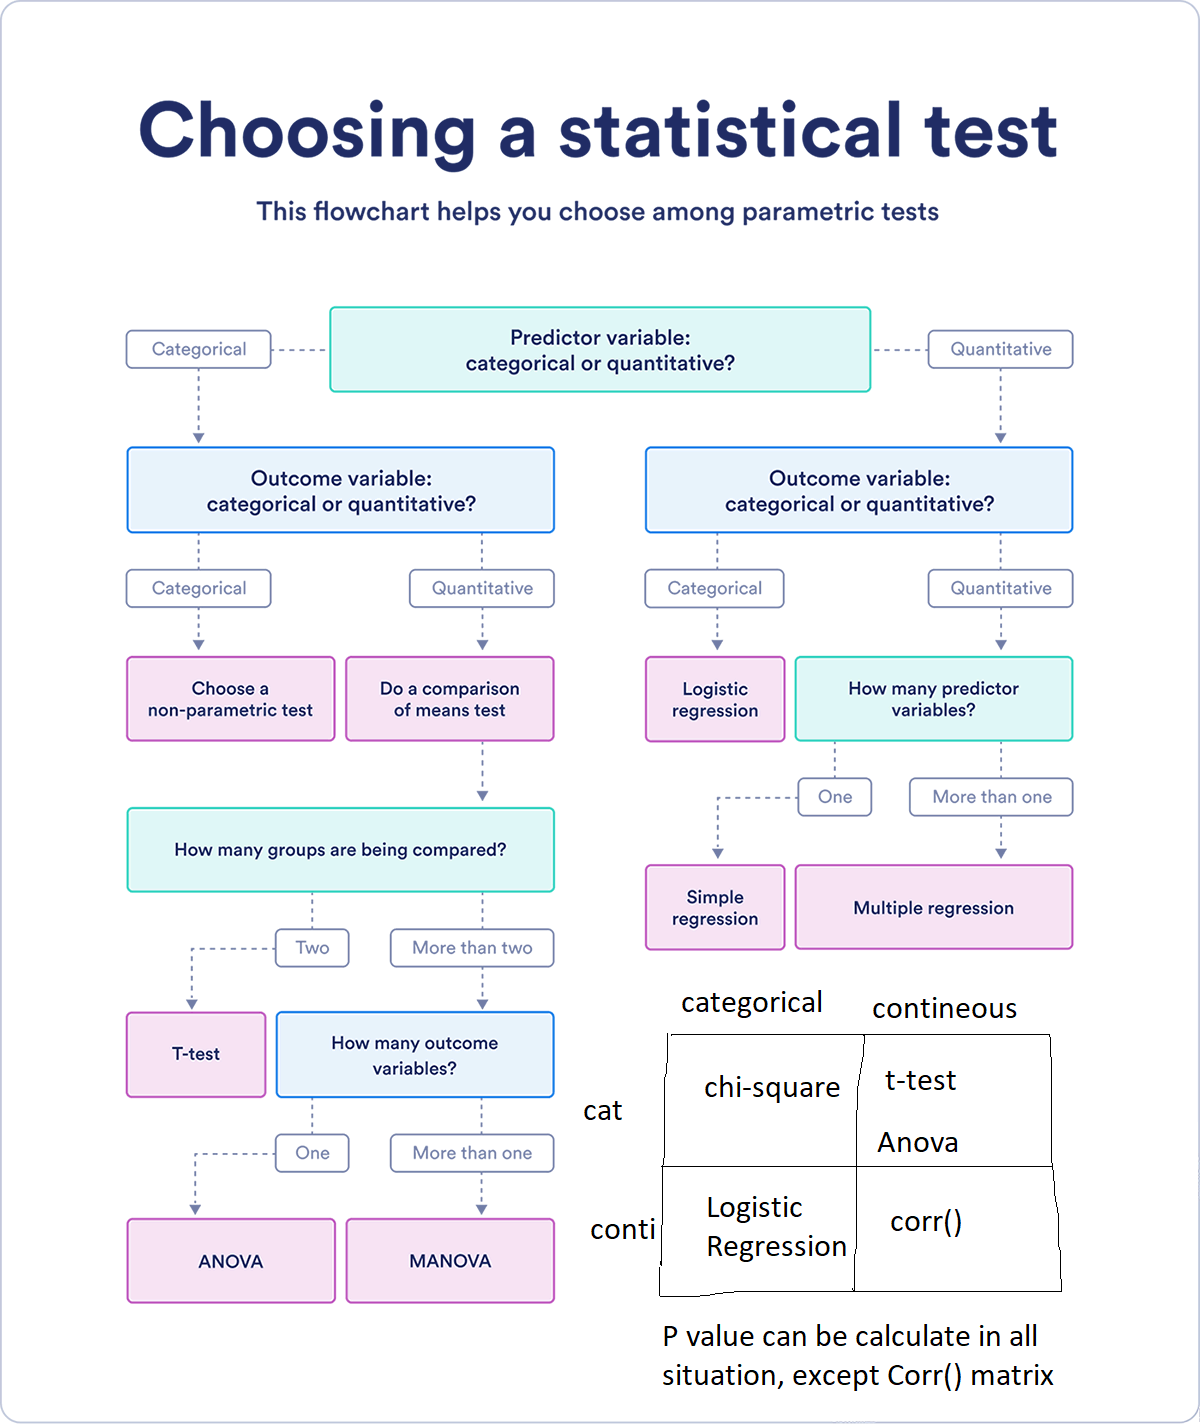